In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #For plotting graphs

from sklearn.model_selection import train_test_split #For machine learning (splitting data)

from sklearn.linear_model import LinearRegression ,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn import datasets

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# read the data and store data in DataFrame titled df
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099



# About the Dataset
1. SPX: SPX share price
2. USO: United States Oil 
3. SLV: iShares Silver Trust
4. EUR/USD: The euro against U.S. dollar pair
5. GLD: Gold Price 


In [3]:
df.shape

(2290, 6)

In [4]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [5]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# print a summary of the data in df 
df.describe().T # T method for transpose

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [8]:
##Remove Insignificant Variables
##The column date is redundant for further analysis. Thus, we drop the column.

# drop the column 'Emp_ID' using drop()
# 'axis = 1' drops the specified column
df = df.drop('Date',axis=1)

In [9]:
#Lets look the correlation score
df_corr = pd.DataFrame(df.corr().GLD)
df_corr['GLD'].sort_values(ascending=False)


GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

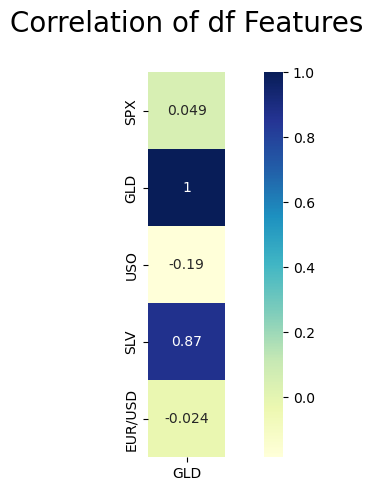

In [10]:
import seaborn as sns

fig, ax=plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(df_corr,square=True, annot=True,cmap='YlGnBu')
plt.title('Correlation of df Features\n',fontsize=20  );

<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: skyblue; font-weight: bold; font-family: Cascadia code;'>
        <center>  Data Visualization </center>
</div>

In [11]:
col = ['SPX','USO','SLV','EUR/USD']

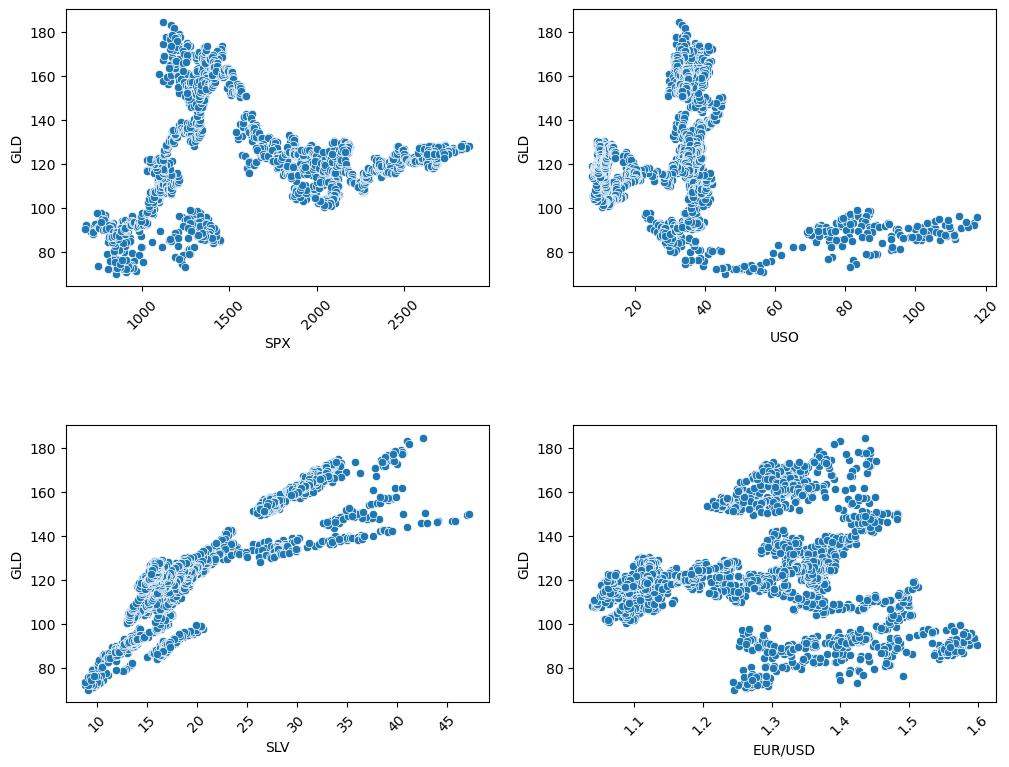

In [12]:
fig,axes = plt.subplots(2,2,figsize=(12,9))
for seg,col in enumerate(col):
    x,y = seg//2,seg%2
    an=sns.scatterplot(x=col, y='GLD' ,data=df, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: skyblue; font-weight: bold; font-family: Cascadia code;'>
        <center> Functions </center>
</div>

In [13]:
#Create generalized functions to calculate various metrics for models
#Create a generalized function to calculate the MSE for test set.
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(x_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 3)
    
    # return the training RMSE
    return(rmse_train)

In [14]:
# create a generalized function to calculate the MAE values test set
def get_test_mae(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(x_test)

    # MAE for the test data using "mean_absolute_error"
    # round the value upto 4 digits using 'round()'

    mae_test = round(metrics.mean_absolute_error(y_test,test_pred), 3)

    # return the test MAE
    return(mae_test)

In [15]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(x_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 3)

    # return the test RMSE
    return(rmse_test)

In [16]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Number of Features','Test_MAE', 'Test_RMSE', 'Train_RMSE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, N = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Number of Features': N, 
                       'Test_MAE': get_test_mae(model),
                        'Train_RMSE': get_train_rmse(model),
                       'Test_RMSE': get_test_rmse(model), }, ignore_index = True)

In [17]:
def Visualising(model):
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    y_pred = model.predict(x_test)

    #Visualising the Accuracy of Predicted result
    plt.plot(y_test, color = 'blue', label = 'Acutal')
    plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
    plt.grid(0.3)
    plt.title('Acutal vs Predicted')
    plt.xlabel('Number of Oberservation')
    plt.ylabel('GLD')
    plt.legend()
    plt.show()

<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center> Selecting The Prediction Target </center>
</div>


In [18]:
#Selecting The Prediction Target
selected_feature_y = df[["GLD"]]

<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: orange; font-weight: bold; font-family: Cascadia code;'>
        <center> Improvement Experiments with One Feature </center>
</div>

In [19]:
# select one feature which is the price of silver
selected_feature_x = df[['SLV']]
#Selecting The Prediction Target
#selected_feature_y = df[["GLD"]]
                        

sfx = np.array(selected_feature_x) #Convert <class 'pandas.core.frame.DataFrame’> to array
sfy = np.array(selected_feature_y)


# split data into training and testing data, for both features and target
x_train,x_test,y_train,y_test=train_test_split(sfx,sfy,test_size=0.2)

<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Linear Regression Model </left>
</div>

In [20]:
#Assume the linear model y = w0 + w1x1 + w2x2

# Define Linear Regression model.
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
Model = linreg.fit(x_train,y_train)

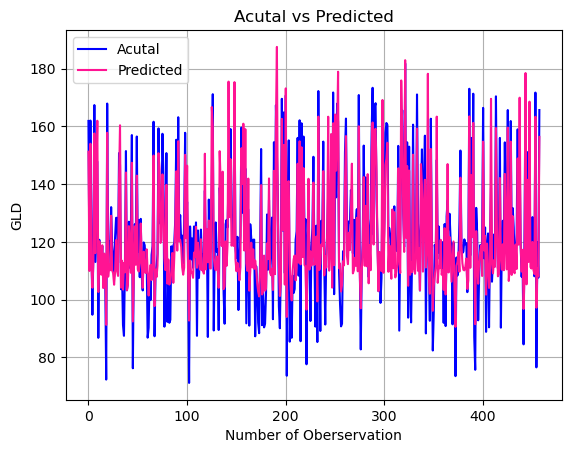

In [21]:
# Visualize prediction vs. actual prices
Visualising(Model)

In [22]:
# updating score card -- call the update_score_card function
update_score_card(algorithm_name = 'Linear Regression',model = Model , N= 'One')
score_card

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1301071035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Linear Regression,One,9.043,11.202,11.717


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Stochastic Gradient Descent (SGD) Model </left>
</div>

In [23]:
 # Stochastic Gradient Descent (SGD)

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(x_train, y_train.ravel())

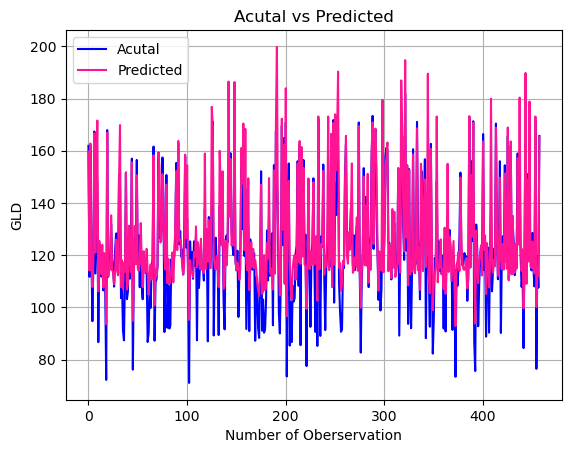

In [24]:
# Visualize prediction vs. actual prices
Visualising(linreg_with_SGD)

In [25]:
# updating score card -- call the update_score_card function
update_score_card(algorithm_name = 'Linear Regression (using SGD)',model = linreg_with_SGD ,N= 'One')
score_card

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1301071035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Linear Regression,One,9.043,11.202,11.717
1,Linear Regression (using SGD),One,8.313,12.363,13.157


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: orange; font-weight: bold; font-family: Cascadia code;'>
        <center> Improvement Experiments with Two Features </center>
</div>

In [26]:
# select two features which are the price of silver & United States Oil
selected_feature_x = df[['SLV','USO']]                        

sfx = np.array(selected_feature_x) #Convert <class 'pandas.core.frame.DataFrame’> to array
sfy = np.array(selected_feature_y)

# split data into training and testing data, for both features and target
x_train,x_test,y_train,y_test=train_test_split(sfx,sfy,test_size=0.2)

<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Linear Regression Model </left>
</div>

In [27]:
#Assume the linear model y = w0 + w1x1 + w2x2
# Define Linear Regression model.
linreg = LinearRegression()

    # build the model using X_train and y_train
    # use fit() to fit the regression model
Model1 = linreg.fit(x_train,y_train)
    

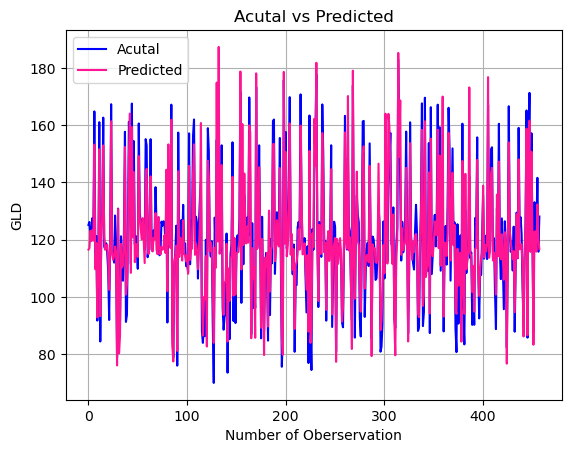

In [28]:
# Visualize prediction vs. actual prices
Visualising(Model1)

In [29]:
update_score_card(algorithm_name = 'Linear Regression',model = Model1 ,N= 'Two')
score_card

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1301071035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Linear Regression,One,9.043,11.202,11.717
1,Linear Regression (using SGD),One,8.313,12.363,13.157
2,Linear Regression,Two,6.138,7.857,8.752


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Stochastic Gradient Descent (SGD) Model </left>
</div>

In [30]:
 #Stochastic Gradient Descent

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(x_train, y_train.ravel())

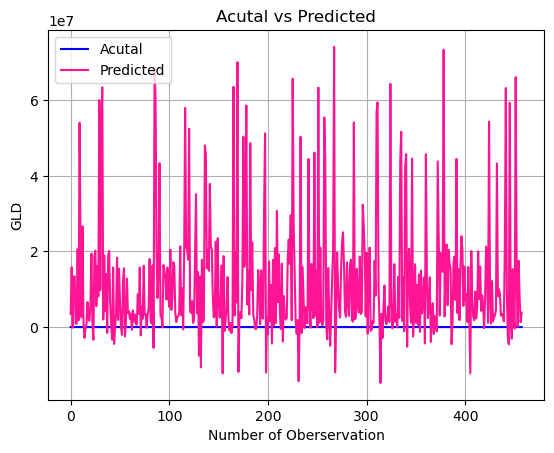

In [31]:
# Visualize prediction vs. actual prices
Visualising(linreg_with_SGD)

In [32]:
update_score_card(algorithm_name = 'Linear Regression (using SGD)',model = linreg_with_SGD ,N= 'Two')
score_card

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1301071035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Linear Regression,One,9.043000e+00,1.120200e+01,1.171700e+01
1,Linear Regression (using SGD),One,8.313000e+00,1.236300e+01,1.315700e+01
2,Linear Regression,Two,6.138000e+00,7.857000e+00,8.752000e+00
3,Linear Regression (using SGD),Two,1.286675e+07,2.019624e+07,1.858398e+07


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: orange; font-weight: bold; font-family: Cascadia code;'>
        <center> Improvement Experiments with Three Features </center>
</div>

In [33]:
# select three features which are the price of silver & United States Oil & SPX share price
selected_3features_x = df[['SLV','USO','SPX']]
                        

sfx = np.array(selected_3features_x) #Convert <class 'pandas.core.frame.DataFrame’> to array
sfy = np.array(selected_feature_y)

# split data into training and testing data, for both features and target
x_train,x_test,y_train,y_test=train_test_split(sfx,sfy,test_size=0.2)


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Linear Regression Model </left>
</div>

In [34]:
#Assume the linear model y = w0 + w1x1 + w2x2 + w3x3
# Define Linear Regression model.
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
Model2 = linreg.fit(x_train,y_train)

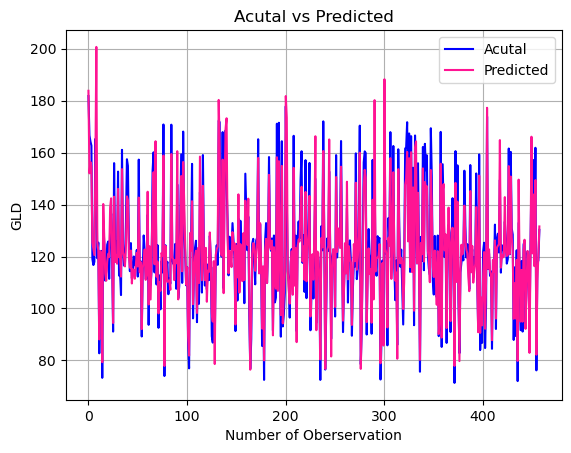

In [35]:
# Visualize prediction vs. actual prices
Visualising(Model2)

In [36]:
update_score_card(algorithm_name = 'Linear Regression',model = Model2,N= 'Three')
score_card

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1301071035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Linear Regression,One,9.043000e+00,1.120200e+01,1.171700e+01
1,Linear Regression (using SGD),One,8.313000e+00,1.236300e+01,1.315700e+01
2,Linear Regression,Two,6.138000e+00,7.857000e+00,8.752000e+00
3,Linear Regression (using SGD),Two,1.286675e+07,2.019624e+07,1.858398e+07
4,Linear Regression,Three,5.583000e+00,7.361000e+00,8.213000e+00


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Stochastic Gradient Descent (SGD) Model </left>
</div>

In [37]:
 #Stochastic Gradient Descent

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(x_train, y_train.ravel())

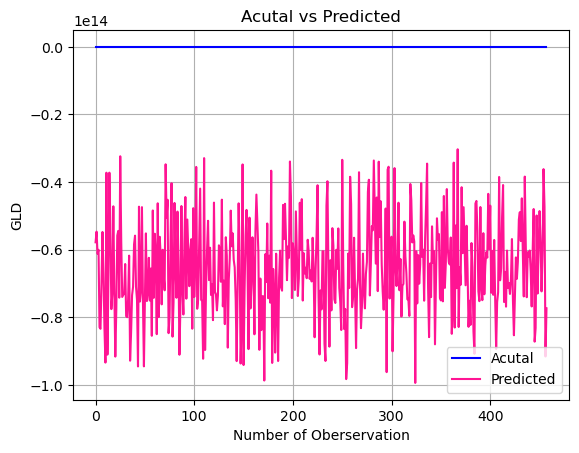

In [38]:
# Visualize prediction vs. actual prices
Visualising(linreg_with_SGD)

In [39]:
update_score_card(algorithm_name = 'Linear Regression (using SGD)',model = linreg_with_SGD ,N= 'Three')
score_card

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1301071035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Linear Regression,One,9.043000e+00,1.120200e+01,1.171700e+01
1,Linear Regression (using SGD),One,8.313000e+00,1.236300e+01,1.315700e+01
2,Linear Regression,Two,6.138000e+00,7.857000e+00,8.752000e+00
3,Linear Regression (using SGD),Two,1.286675e+07,2.019624e+07,1.858398e+07
4,Linear Regression,Three,5.583000e+00,7.361000e+00,8.213000e+00
5,Linear Regression (using SGD),Three,6.519274e+13,6.679471e+13,6.583784e+13


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Random Forest Regressor Model </left>
</div>

In [40]:
#Now fitting the Random forest regression to the traning set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train.ravel())

RandomForestRegressor(random_state=0)

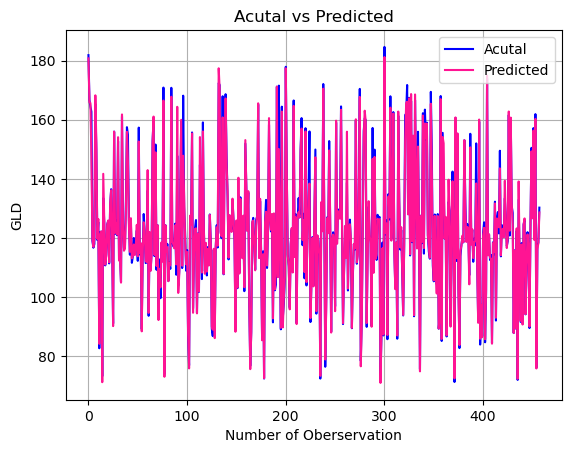

In [41]:
# Visualize prediction vs. actual prices
Visualising(regressor)

In [42]:
#Now predicting the test set result
y_pred = regressor.predict(x_test)

In [43]:
update_score_card(algorithm_name = 'Random Forest Regressor',model = regressor ,N= 'Three')
score_card

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1301071035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Linear Regression,One,9.043000e+00,1.120200e+01,1.171700e+01
1,Linear Regression (using SGD),One,8.313000e+00,1.236300e+01,1.315700e+01
2,Linear Regression,Two,6.138000e+00,7.857000e+00,8.752000e+00
3,Linear Regression (using SGD),Two,1.286675e+07,2.019624e+07,1.858398e+07
4,Linear Regression,Three,5.583000e+00,7.361000e+00,8.213000e+00
5,Linear Regression (using SGD),Three,6.519274e+13,6.679471e+13,6.583784e+13
6,Random Forest Regressor,Three,1.595000e+00,3.082000e+00,1.166000e+00


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: orange; font-weight: bold; font-family: Cascadia code;'>
        <center> Improvement Experiments with Four Features </center>
</div>

In [44]:
#Assume the linear model y = w0 + w1x1 + w2x2 + w3x3 + w4x4
# Define Linear Regression model.
selected_feature_x = df[['SPX','USO','SLV','EUR/USD']]
                        

sfx = np.array(selected_feature_x) #Convert <class 'pandas.core.frame.DataFrame’> to array
sfy = np.array(selected_feature_y)

# split data into training and testing data, for both features and target
x_train,x_test,y_train,y_test=train_test_split(sfx,sfy,test_size=0.2)

<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Linear Regression Model </left>
</div>

In [45]:
# Define Linear Regression model.
#Assume the linear model y = w0 + w1 x
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
Model3 = linreg.fit(x_train,y_train)


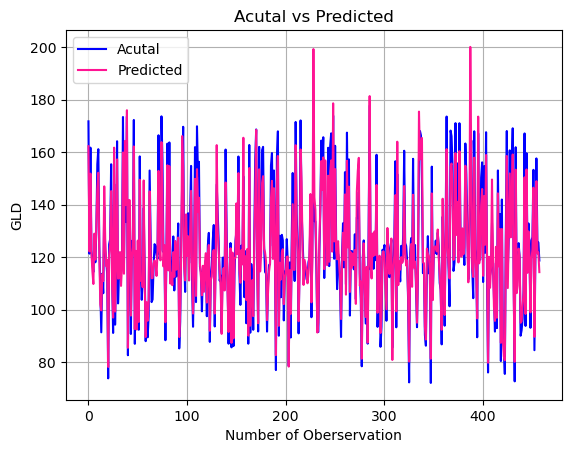

In [46]:
# Visualize prediction vs. actual prices
Visualising(Model3)

In [47]:
update_score_card(algorithm_name = 'Linear Regression',model = Model3 ,N= 'Four')
score_card

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1301071035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Linear Regression,One,9.043000e+00,1.120200e+01,1.171700e+01
1,Linear Regression (using SGD),One,8.313000e+00,1.236300e+01,1.315700e+01
2,Linear Regression,Two,6.138000e+00,7.857000e+00,8.752000e+00
3,Linear Regression (using SGD),Two,1.286675e+07,2.019624e+07,1.858398e+07
4,Linear Regression,Three,5.583000e+00,7.361000e+00,8.213000e+00
5,Linear Regression (using SGD),Three,6.519274e+13,6.679471e+13,6.583784e+13
6,Random Forest Regressor,Three,1.595000e+00,3.082000e+00,1.166000e+00
7,Linear Regression,Four,5.696000e+00,7.463000e+00,8.156000e+00


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Stochastic Gradient Descent (SGD) Model </left>
</div>

In [48]:
 #Stochastic Gradient Descent

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(x_train, y_train.ravel())

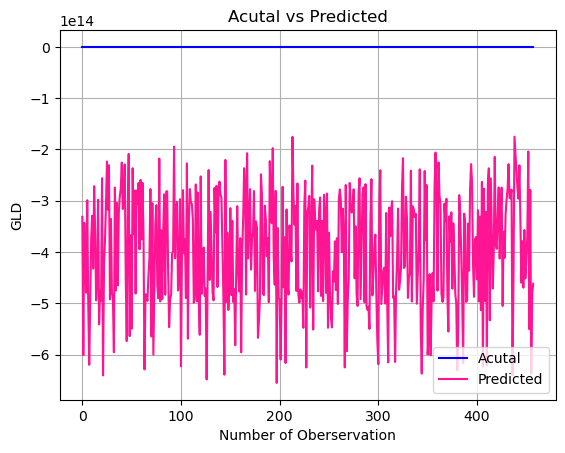

In [49]:
# Visualize prediction vs. actual prices
Visualising(linreg_with_SGD)

In [50]:
update_score_card(algorithm_name = 'Linear Regression (using SGD)',model = linreg_with_SGD ,N= 'Four')
score_card

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1301071035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Linear Regression,One,9.043000e+00,1.120200e+01,1.171700e+01
1,Linear Regression (using SGD),One,8.313000e+00,1.236300e+01,1.315700e+01
2,Linear Regression,Two,6.138000e+00,7.857000e+00,8.752000e+00
3,Linear Regression (using SGD),Two,1.286675e+07,2.019624e+07,1.858398e+07
4,Linear Regression,Three,5.583000e+00,7.361000e+00,8.213000e+00
5,Linear Regression (using SGD),Three,6.519274e+13,6.679471e+13,6.583784e+13
6,Random Forest Regressor,Three,1.595000e+00,3.082000e+00,1.166000e+00
7,Linear Regression,Four,5.696000e+00,7.463000e+00,8.156000e+00
8,Linear Regression (using SGD),Four,3.974559e+14,4.126824e+14,4.154598e+14


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Random Forest Regressor Model </left>
</div>

In [51]:
#Now fitting the Random forest regression to the traning set
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor1.fit(x_train, y_train.ravel())

RandomForestRegressor(random_state=0)

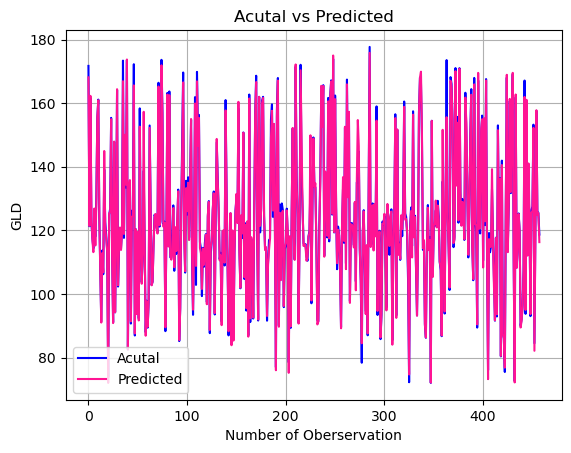

In [52]:
# Visualize prediction vs. actual prices
Visualising(regressor1)

In [53]:
update_score_card(algorithm_name = 'Random Forest Regressor',model = regressor1 ,N= 'Four')
score_card

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1301071035.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Linear Regression,One,9.043000e+00,1.120200e+01,1.171700e+01
1,Linear Regression (using SGD),One,8.313000e+00,1.236300e+01,1.315700e+01
2,Linear Regression,Two,6.138000e+00,7.857000e+00,8.752000e+00
3,Linear Regression (using SGD),Two,1.286675e+07,2.019624e+07,1.858398e+07
4,Linear Regression,Three,5.583000e+00,7.361000e+00,8.213000e+00
5,Linear Regression (using SGD),Three,6.519274e+13,6.679471e+13,6.583784e+13
6,Random Forest Regressor,Three,1.595000e+00,3.082000e+00,1.166000e+00
7,Linear Regression,Four,5.696000e+00,7.463000e+00,8.156000e+00
8,Linear Regression (using SGD),Four,3.974559e+14,4.126824e+14,4.154598e+14
9,Random Forest Regressor,Four,1.292000e+00,2.495000e+00,9.220000e-01


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: salmon; font-weight: bold; font-family: Cascadia code;'>
        <center> Model Comparison </center>
    <h3 style='color:lightblue; font-weight: bold; font-family: Cascadia code;'>
        <center> The less the Root Mean Squared Error (RMSE), The better the model is.

</div>

In [54]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Number of Features,Test_MAE,Test_RMSE,Train_RMSE
0,Random Forest Regressor,Four,1.292000,2.495000,0.922000
1,Random Forest Regressor,Three,1.595000,3.082000,1.166000
2,Linear Regression,Three,5.583000,7.361000,8.213000
3,Linear Regression,Four,5.696000,7.463000,8.156000
4,Linear Regression,Two,6.138000,7.857000,8.752000
5,Linear Regression,One,9.043000,11.202000,11.717000
6,Linear Regression (using SGD),One,8.313000,12.363000,13.157000
7,Linear Regression (using SGD),Two,12866747.346000,20196237.468000,18583983.267000
8,Linear Regression (using SGD),Three,65192737326316.664062,66794712901767.468750,65837835291345.296875
9,Linear Regression (using SGD),Four,397455879518074.000000,412682378066534.312500,415459848438858.750000


<div style='font-size:150%;'>
    <a id='import'></a>
    <h3 style='color: Sliver; font-weight: bold; font-family: Cascadia code;'>
        <left> Polynomial Features Model </left>
</div>

In [55]:
# Create the polynomial object with specified degree
poly_features = PolynomialFeatures(degree=3, include_bias=False)

# Train the polynomial features
X_poly = poly_features.fit_transform(x_train)

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [57]:
#Now predicting the test set result
X_new_poly = poly_features.transform(x_test)
y_pred = lin_reg.predict(X_new_poly)

In [58]:
print('RMAE :'," ", round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))

RMAE :   4.373


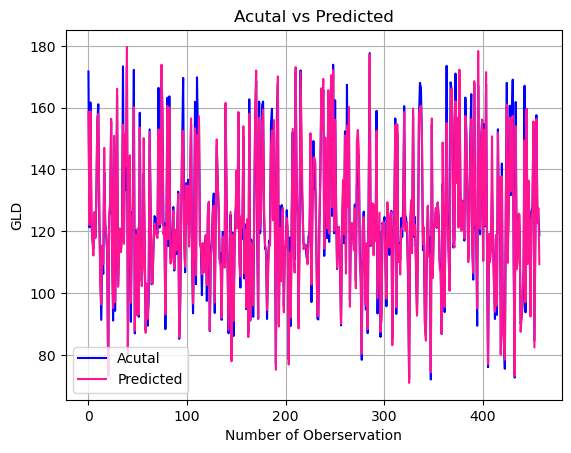

In [60]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()